In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | colomi
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | waingapu
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | magdalena
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | ouadda
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | gimli
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | brufut
Processing Record 18 of Set 1 | rancho palos verdes
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | kloulklubed
Process

Processing Record 36 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 37 of Set 4 | le port
Processing Record 38 of Set 4 | makueni
Processing Record 39 of Set 4 | sabang
Processing Record 40 of Set 4 | kazachka
Processing Record 41 of Set 4 | isangel
Processing Record 42 of Set 4 | goure
Processing Record 43 of Set 4 | makat
Processing Record 44 of Set 4 | carutapera
Processing Record 45 of Set 4 | port alfred
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | bredasdorp
Processing Record 48 of Set 4 | kamina
Processing Record 49 of Set 4 | pajan
Processing Record 50 of Set 4 | jamestown
Processing Record 1 of Set 5 | komsomolskiy
Processing Record 2 of Set 5 | atar
Processing Record 3 of Set 5 | vilyuysk
Processing Record 4 of Set 5 | ndioum
Processing Record 5 of Set 5 | gazimurskiy zavod
Processing Record 6 of Set 5 | dikson
Processing Record 7 of Set 5 | kudahuvadhoo
Processing Record 8 of Set 5 | salalah
Processing Record 9 of Set 5 | hamilto

Processing Record 29 of Set 8 | sobrance
Processing Record 30 of Set 8 | paulo afonso
Processing Record 31 of Set 8 | talkha
Processing Record 32 of Set 8 | tacuati
Processing Record 33 of Set 8 | armidale
Processing Record 34 of Set 8 | carroll
Processing Record 35 of Set 8 | salinopolis
Processing Record 36 of Set 8 | baft
Processing Record 37 of Set 8 | ornskoldsvik
Processing Record 38 of Set 8 | baykit
Processing Record 39 of Set 8 | port macquarie
Processing Record 40 of Set 8 | mao
Processing Record 41 of Set 8 | vlasinesti
Processing Record 42 of Set 8 | tromso
Processing Record 43 of Set 8 | crotone
Processing Record 44 of Set 8 | husavik
Processing Record 45 of Set 8 | barawe
City not found. Skipping...
Processing Record 46 of Set 8 | marzuq
Processing Record 47 of Set 8 | maneadero
Processing Record 48 of Set 8 | batagay-alyta
Processing Record 49 of Set 8 | pangkalanbuun
Processing Record 50 of Set 8 | williamsburg
Processing Record 1 of Set 9 | havre
Processing Record 2 of

Processing Record 16 of Set 12 | kiama
Processing Record 17 of Set 12 | touros
Processing Record 18 of Set 12 | malanje
Processing Record 19 of Set 12 | valdez
Processing Record 20 of Set 12 | kadyy
Processing Record 21 of Set 12 | orvault
Processing Record 22 of Set 12 | utiroa
City not found. Skipping...
Processing Record 23 of Set 12 | puksoozero
Processing Record 24 of Set 12 | riyadh
Processing Record 25 of Set 12 | dryden
Processing Record 26 of Set 12 | sumbal
Processing Record 27 of Set 12 | sao felix do xingu
Processing Record 28 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 29 of Set 12 | saint-leu
Processing Record 30 of Set 12 | jyvaskyla
Processing Record 31 of Set 12 | uige
Processing Record 32 of Set 12 | souillac
Processing Record 33 of Set 12 | tual
Processing Record 34 of Set 12 | agva
City not found. Skipping...
Processing Record 35 of Set 12 | praia da vitoria
Processing Record 36 of Set 12 | independence
Processing Record 37 of Set 12 | nac

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,-30.73,80,0,7.05,RU,2021-01-27 23:32:40
1,Colomi,-17.3500,-65.8667,69.80,52,75,17.27,BO,2021-01-27 23:32:40
2,Upernavik,72.7868,-56.1549,-3.51,91,99,4.74,GL,2021-01-27 23:32:40
3,Butaritari,3.0707,172.7902,80.20,81,82,13.24,KI,2021-01-27 23:27:40
4,Waingapu,-9.6567,120.2641,81.07,77,100,12.33,ID,2021-01-27 23:32:40
5,Cape Town,-33.9258,18.4232,64.99,68,0,17.27,ZA,2021-01-27 23:29:25
6,Magdalena,14.1999,121.4290,79.00,94,75,2.30,PH,2021-01-27 23:32:40
7,Busselton,-33.6500,115.3333,59.00,95,8,11.72,AU,2021-01-27 23:32:40
8,Ouadda,8.0777,22.4007,74.16,20,33,6.02,CF,2021-01-27 23:32:41
9,Tasiilaq,65.6145,-37.6368,21.20,45,90,18.41,GL,2021-01-27 23:27:56


In [19]:
len(city_data)

553

In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

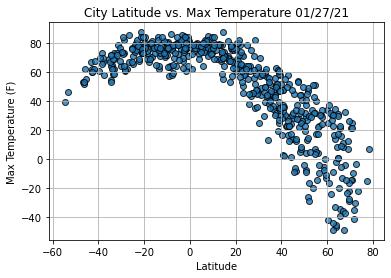

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

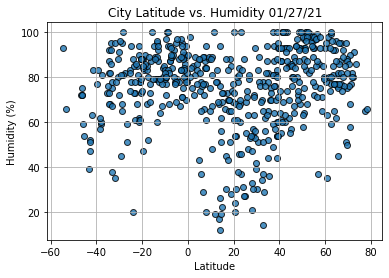

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

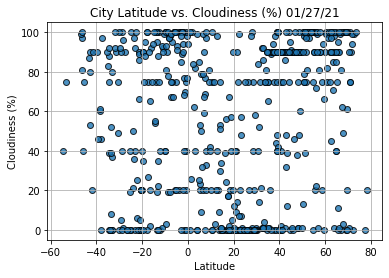

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

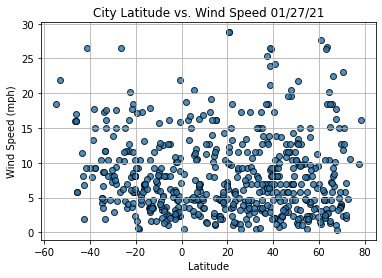

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Lat                         -54.8
Lng                         -68.3
Max Temp                     39.2
Humidity                       93
Cloudiness                     40
Wind Speed                  18.41
Country                        AR
Date          2021-01-27 23:27:47
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
548    False
549     True
550     True
551     True
552     True
Name: Lat, Length: 553, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,-30.73,80,0,7.05,RU,2021-01-27 23:32:40
2,Upernavik,72.7868,-56.1549,-3.51,91,99,4.74,GL,2021-01-27 23:32:40
3,Butaritari,3.0707,172.7902,80.20,81,82,13.24,KI,2021-01-27 23:27:40
6,Magdalena,14.1999,121.4290,79.00,94,75,2.30,PH,2021-01-27 23:32:40
8,Ouadda,8.0777,22.4007,74.16,20,33,6.02,CF,2021-01-27 23:32:41


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

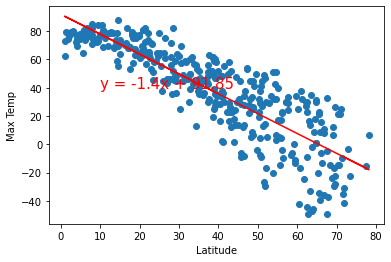

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

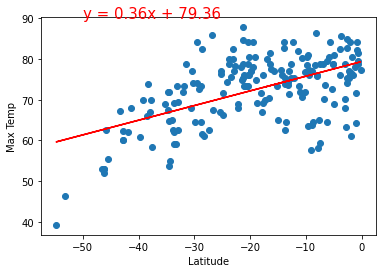

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

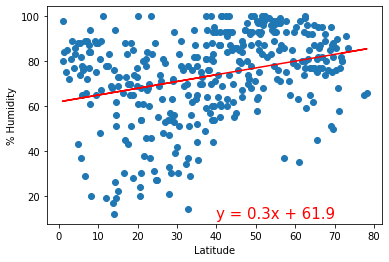

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

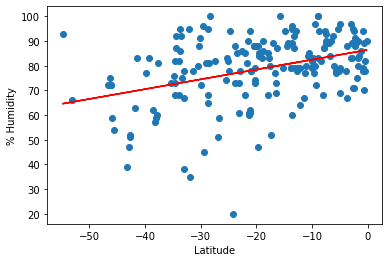

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for % Humidity", '% Humidity',(-50,15))

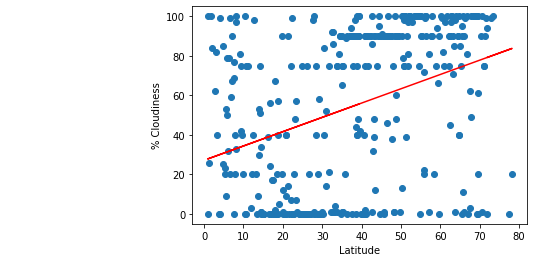

In [39]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

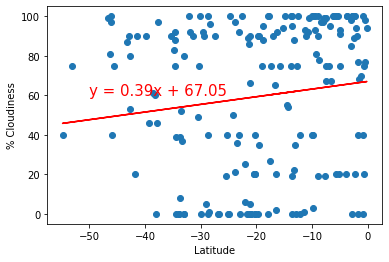

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

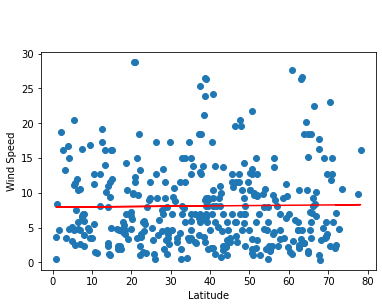

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

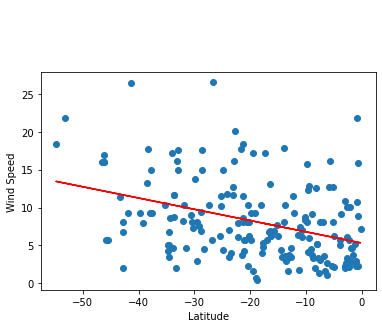

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))